---
title: "2. Coordinate Reference Systems"
author: "kim dayeon"
date: today
categories: [news, code, analysis]
image: 2.Coor.png
---

# Introduction

You are a bird conservation expert and want to understand migration patterns of purple martins.  In your research, you discover that these birds typically spend the summer breeding season in the eastern United States, and then migrate to South America for the winter.  But since this bird is under threat of endangerment, you'd like to take a closer look at the locations that these birds are more likely to visit.

<center>
<img src="https://storage.googleapis.com/kaggle-media/learn/images/qQcS0KM.png" width="1000"><br/>
</center>

There are several [protected areas](https://www.iucn.org/theme/protected-areas/about) in South America, which operate under special regulations to ensure that species that migrate (or live) there have the best opportunity to thrive.  You'd like to know if purple martins tend to visit these areas.  To answer this question, you'll use some recently collected data that tracks the year-round location of eleven different birds.

Before you get started, run the code cell below to set everything up.

In [10]:
import pandas as pd
import geopandas as gpd

from shapely.geometry import LineString

#from learntools.core import binder
#binder.bind(globals())
#from learntools.geospatial.ex2 import *

# Exercises

### 1) Load the data.

Run the next code cell (without changes) to load the GPS data into a pandas DataFrame `birds_df`.  

In [23]:
# Load the data and print the first 5 rows
birds_df = pd.read_csv("D:/archive (1)/purple_martin.csv", parse_dates=['timestamp'])
print("There are {} different birds in the dataset.".format(birds_df["tag-local-identifier"].nunique()))
birds_df.head()

There are 11 different birds in the dataset.


,timestamp,location-long,location-lat,tag-local-identifier
0,2014-08-15 05:56:00,-88.146014,17.513049,30448
1,2014-09-01 05:59:00,-85.243501,13.095782,30448
2,2014-10-30 23:58:00,-62.906089,-7.852436,30448
3,2014-11-15 04:59:00,-61.776826,-11.723898,30448
4,2014-11-30 09:59:00,-61.241538,-11.612237,30448


In [25]:
# Your code here: Create the GeoDataFrame
birds = gpd.GeoDataFrame(birds_df, geometry=gpd.points_from_xy(birds_df["location-long"], birds_df["location-lat"]))

# Your code here: Set the CRS to {'init': 'epsg:4326'}
birds.crs = {'init': 'epsg:4326'}

# Check your answer
birds.head()

c:\Users\jiyeo\anaconda3\envs\dayeon\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,timestamp,location-long,location-lat,tag-local-identifier,geometry
0,2014-08-15 05:56:00,-88.146014,17.513049,30448,POINT (-88.14601 17.51305)
1,2014-09-01 05:59:00,-85.243501,13.095782,30448,POINT (-85.24350 13.09578)
2,2014-10-30 23:58:00,-62.906089,-7.852436,30448,POINT (-62.90609 -7.85244)
3,2014-11-15 04:59:00,-61.776826,-11.723898,30448,POINT (-61.77683 -11.72390)
4,2014-11-30 09:59:00,-61.241538,-11.612237,30448,POINT (-61.24154 -11.61224)


# 데이터 시각화 하기

In [15]:
# Load a GeoDataFrame with country boundaries in North/South America, print the first 5 rows
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
americas = world.loc[world['continent'].isin(['North America', 'South America'])]
americas.head()

C:\Users\jiyeo\AppData\Local\Temp\ipykernel_7052\2146633488.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
9,44938712.0,South America,Argentina,ARG,445445,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000..."
10,18952038.0,South America,Chile,CHL,282318,"MULTIPOLYGON (((-68.63401 -52.63637, -68.63335..."
16,11263077.0,North America,Haiti,HTI,14332,"POLYGON ((-71.71236 19.71446, -71.62487 19.169..."


<Axes: >

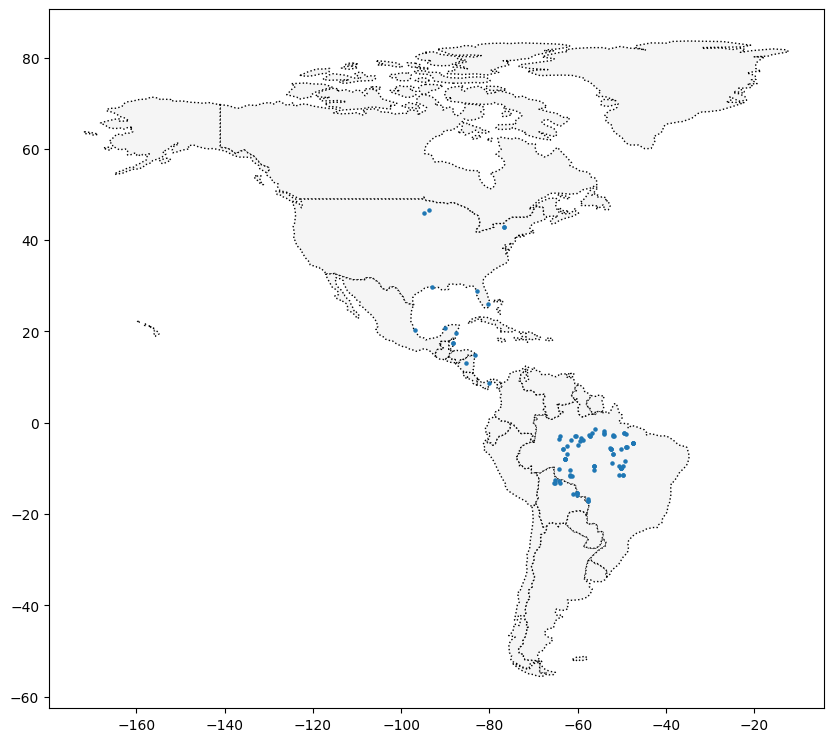

In [26]:
# Create a map
ax = americas.plot(figsize=(10, 10), color='whitesmoke', linestyle=':', edgecolor='black')
birds.plot(ax = ax, markersize=5)

# 각 새의 여행 시작점과 끝점 알아내기 (part 1)
 3) Where does each bird start and end its journey? (Part 1)?

In [29]:
# GeoDataFrame showing path for each bird
#각 새의 경로를 표시함 
path_df = birds.groupby("tag-local-identifier")['geometry'].apply(list).apply(lambda x: LineString(x)).reset_index()
path_gdf = gpd.GeoDataFrame(path_df, geometry=path_df.geometry)
path_gdf.crs = {'init' :'epsg:4326'}
path_gdf.head()

c:\Users\jiyeo\anaconda3\envs\dayeon\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,tag-local-identifier,geometry
0,30048,"LINESTRING (-90.12992 20.73242, -56.29394 -10...."
1,30054,"LINESTRING (-93.60861 46.50563, -63.28897 -5.7..."
2,30198,"LINESTRING (-80.31036 25.92545, -88.14608 17.5..."
3,30263,"LINESTRING (-76.78146 42.99209, -62.90648 -7.8..."
4,30275,"LINESTRING (-76.78213 42.99207, -60.26131 -15...."


In [30]:
# GeoDataFrame showing starting point for each bird
# 각 새의 시작점 표시
start_df = birds.groupby("tag-local-identifier")['geometry'].apply(list).apply(lambda x: x[0]).reset_index()
start_gdf = gpd.GeoDataFrame(start_df, geometry=start_df.geometry)
start_gdf.crs = {'init' :'epsg:4326'}

# Show first five rows of GeoDataFrame
start_gdf.head()

c:\Users\jiyeo\anaconda3\envs\dayeon\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,tag-local-identifier,geometry
0,30048,POINT (-90.12992 20.73242)
1,30054,POINT (-93.60861 46.50563)
2,30198,POINT (-80.31036 25.92545)
3,30263,POINT (-76.78146 42.99209)
4,30275,POINT (-76.78213 42.99207)


# 새의 끝점을 data frame으로 만드는 셀 생성

형식은 두개의 열 ("tag-local-identifier" 및 "geometry")이 있어 start_gdf(시작점)과 형식이 동일해야함 /geometry 열에 point 객체가 포함되야함

end_gdf(끝점)의 crs는 init : crs: 4326으로 설정합니다.

In [31]:
end_gdf = birds.groupby("tag-local-identifier")['geometry'].apply(list).apply(lambda x: x[-1]).reset_index()
end_gdf = gpd.GeoDataFrame(end_gdf, geometry=end_gdf.geometry)
end_gdf.crs = {'init' :'epsg:4326'}

# Show first five rows of GeoDataFrame
start_gdf.head()

c:\Users\jiyeo\anaconda3\envs\dayeon\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,tag-local-identifier,geometry
0,30048,POINT (-90.12992 20.73242)
1,30054,POINT (-93.60861 46.50563)
2,30198,POINT (-80.31036 25.92545)
3,30263,POINT (-76.78146 42.99209)
4,30275,POINT (-76.78213 42.99207)


# 각 새는 어디에서 여행을 시작하고 끝납니까?

4) Where does each bird start and end its journey? (Part 2)?


* path_gdf,start_gdf & end_gdf 를 사용하여 모든 새의 경로를 시각화 해라
  미국 GeoDataFame을 사용할수 있음

<Axes: >

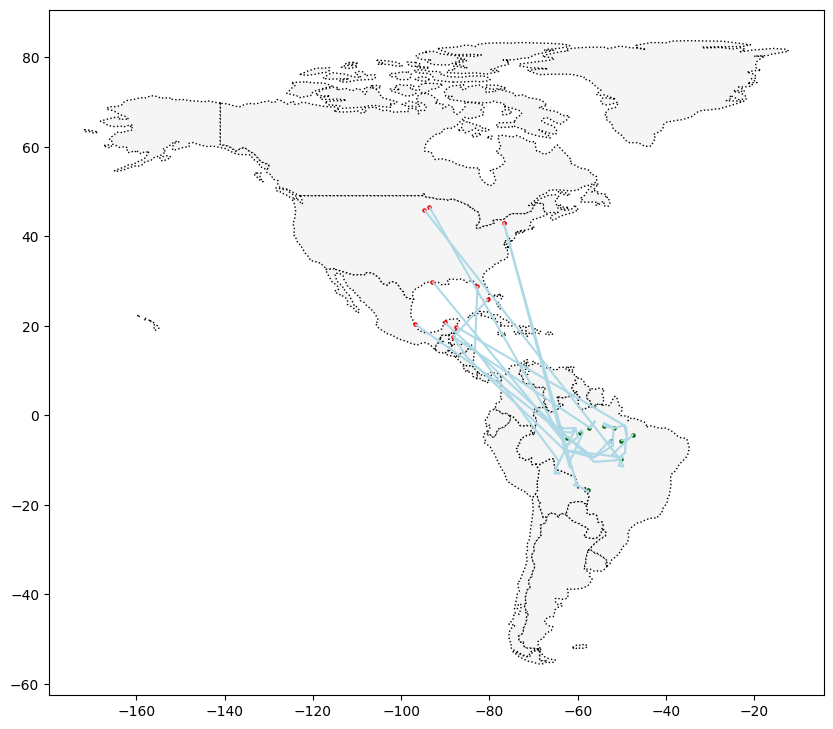

In [38]:
ax = americas.plot(figsize=(10, 10), color='whitesmoke', linestyle=':', edgecolor='black')
path_gdf.plot(ax = ax, markersize=5,color = 'lightblue')
start_gdf.plot(ax = ax, markersize=5,color = 'red')
end_gdf.plot(ax = ax, markersize=5,color="darkgreen")

# 남미의 보호지역은 어딘가? (part 1)

새들은 남미 어딘가에 도착하는데 그 새들은 보호지역으로 가고있나요?

* 남아메리카의 모든 모호지역 위치를 (GeoDataFrame)protected_areas를 생성해라

In [41]:
# Path of the shapefile to load
protected_areas= gpd.read_file("D:/archive (1)/SAPA_Aug2019-shapefile/SAPA_Aug2019-shapefile/SAPA_Aug2019-shapefile-polygons.shp")

protected_areas.head()

,WDPAID,WDPA_PID,PA_DEF,NAME,ORIG_NAME,DESIG,DESIG_ENG,DESIG_TYPE,IUCN_CAT,INT_CRIT,...,GOV_TYPE,OWN_TYPE,MANG_AUTH,MANG_PLAN,VERIF,METADATAID,SUB_LOC,PARENT_ISO,ISO3,geometry
0,14067.0,14067,1,Het Spaans Lagoen,Het Spaans Lagoen,"Ramsar Site, Wetland of International Importance","Ramsar Site, Wetland of International Importance",International,Not Reported,Not Reported,...,Not Reported,Not Reported,Not Reported,Management plan is not implemented and not ava...,State Verified,1856,Not Reported,NLD,ABW,"POLYGON ((-69.97523 12.47379, -69.97523 12.473..."
1,14003.0,14003,1,Bubali Pond Bird Sanctuary,Bubali Pond Bird Sanctuary,Bird Sanctuary,Bird Sanctuary,National,Not Reported,Not Applicable,...,Not Reported,Not Reported,Not Reported,Not Reported,State Verified,1899,Not Reported,NLD,ABW,"POLYGON ((-70.04734 12.56329, -70.04615 12.563..."
2,555624439.0,555624439,1,Arikok National Park,Arikok National Park,National Park,National Park,National,Not Reported,Not Applicable,...,Non-profit organisations,Non-profit organisations,Fundacion Parke Nacional Arikok,Not Reported,State Verified,1899,Not Reported,NLD,ABW,"MULTIPOLYGON (((-69.96302 12.48384, -69.96295 ..."
3,303894.0,303894,1,Madidi,Madidi,Area Natural de Manejo Integrado,Natural Integrated Management Area,National,Not Reported,Not Applicable,...,Federal or national ministry or agency,Not Reported,Not Reported,Not Reported,State Verified,1860,BO-L,BOL,BOL,"POLYGON ((-68.59060 -14.43388, -68.59062 -14.4..."
4,303893.0,303893,1,Apolobamba,Apolobamba,Area Natural de Manejo Integado Nacional,National Natural Integrated Management Area,National,Not Reported,Not Applicable,...,Federal or national ministry or agency,Not Reported,Not Reported,Not Reported,State Verified,1860,BO-L,BOL,BOL,"POLYGON ((-69.20949 -14.73334, -69.20130 -14.7..."


# 남비의 보호지역은 ? (part 2)

* 남아메리카의 보호지역 위치 표시하기
* (GeoDataFame)protected_areas 사용해 plot그리기
* 일부 보호 지역은 육지에 있고 다른 지역은 해수에 있음을 알수 있다.

<Axes: >

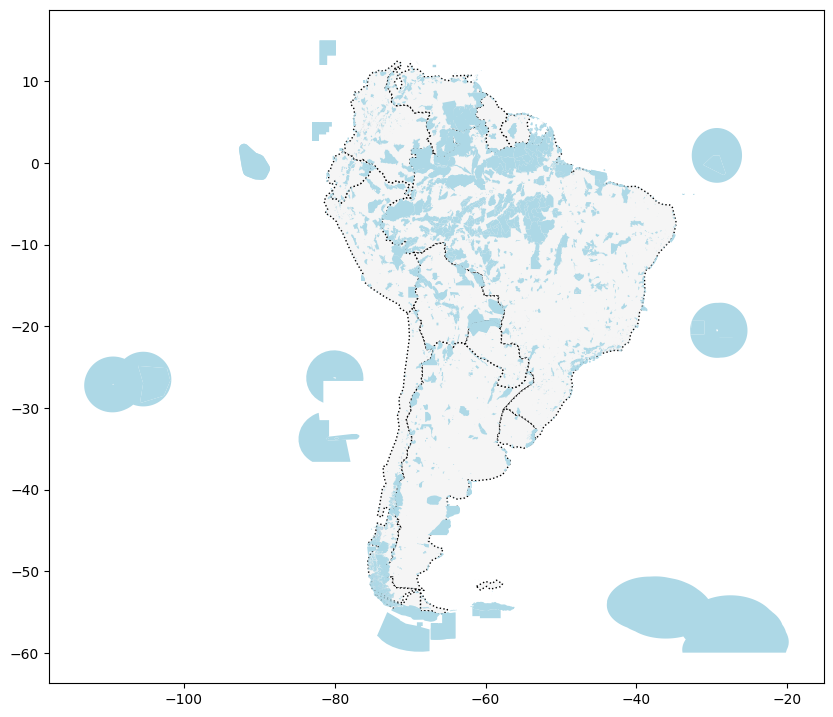

In [43]:
south_america = americas.loc[americas['continent']=='South America']


ax = south_america.plot(figsize=(10, 10), color='whitesmoke', linestyle=':', edgecolor='black')
protected_areas.plot(ax = ax, markersize=5,color = 'lightblue')


# 남아메리카의 몇 퍼센트가 보호됩니까?

* 1. 남미의 모든 보호 토지(해양 지역 제외) 총면적 계산하기

"REP_AREA" 및 "REP_M_AREA" 열사용


In [45]:
P_Area = sum(protected_areas['REP_AREA']-protected_areas['REP_M_AREA'])
print("South America has {} square kilometers of protected areas.".format(P_Area))

south_america.head()

South America has 5396761.9116883585 square kilometers of protected areas.


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
9,44938712.0,South America,Argentina,ARG,445445,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000..."
10,18952038.0,South America,Chile,CHL,282318,"MULTIPOLYGON (((-68.63401 -52.63637, -68.63335..."
20,3398.0,South America,Falkland Is.,FLK,282,"POLYGON ((-61.20000 -51.85000, -60.00000 -51.2..."
28,3461734.0,South America,Uruguay,URY,56045,"POLYGON ((-57.62513 -30.21629, -56.97603 -30.1..."
29,211049527.0,South America,Brazil,BRA,1839758,"POLYGON ((-53.37366 -33.76838, -53.65054 -33.2..."


각 폴리곤의 면적 속성 (crs로 epsg 3035사용) 국가의 면적 계산 후 결과 합치기


" 답을 평방 킬로미터 단위로 변경"

In [52]:
totalArea = sum(south_america.geometry.to_crs(epsg=3035).area) / 10**6

In [53]:
# 보호되는 남미의 비율 계산하기
percentage_protected = P_Area/totalArea
print('Approximately {}% of South America is protected.'.format(round(percentage_protected*100, 2)))

Approximately 30.39% of South America is protected.


# 8. 남아메리카의 새들은 어디에 있나?
-> 보호구역에 새들이 있나요?

* 남미에 있는 새의 위치를 plot하세요
* (토지구성요소가 없는) 순수해양지역인 "MARINE"열을 사용할수 있습니다.
(protected_areas[protected_areas['MARINE']!='2'] 의 행만 표시) 'protected_areas` 의 모든행

In [58]:
birds.head()

,timestamp,location-long,location-lat,tag-local-identifier,geometry
0,2014-08-15 05:56:00,-88.146014,17.513049,30448,POINT (-88.14601 17.51305)
1,2014-09-01 05:59:00,-85.243501,13.095782,30448,POINT (-85.24350 13.09578)
2,2014-10-30 23:58:00,-62.906089,-7.852436,30448,POINT (-62.90609 -7.85244)
3,2014-11-15 04:59:00,-61.776826,-11.723898,30448,POINT (-61.77683 -11.72390)
4,2014-11-30 09:59:00,-61.241538,-11.612237,30448,POINT (-61.24154 -11.61224)


<Axes: >

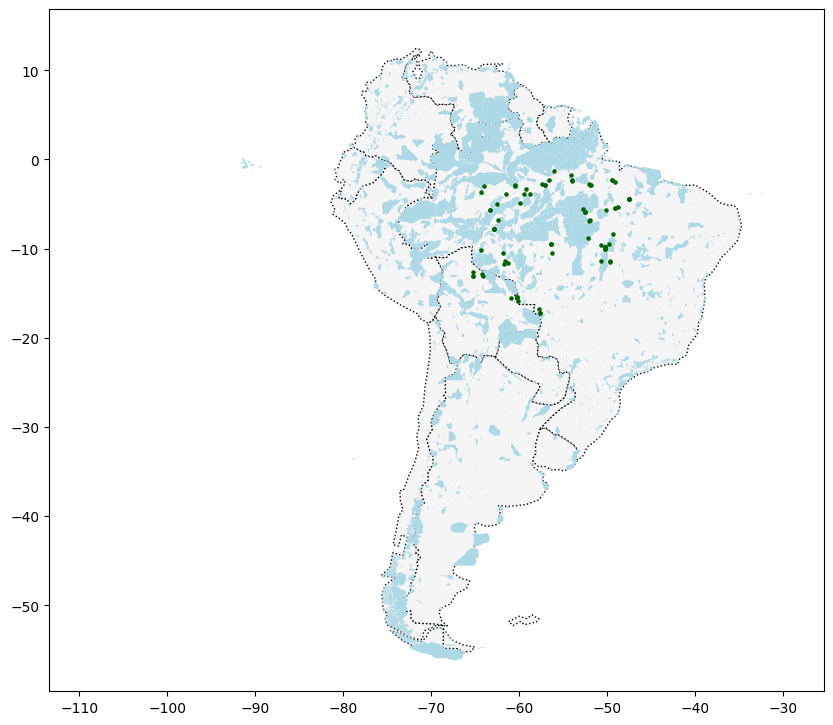

In [60]:
ax = south_america.plot(figsize=(10, 10), color='whitesmoke', linestyle=':', edgecolor='black')


protected_areas[protected_areas['MARINE']!='2'].plot(ax = ax, markersize=5,color = 'lightblue')
birds[birds.geometry.y < 0].plot(ax = ax, markersize=5,color="darkgreen")